In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from pde import PDE, ScalarField, UnitGrid, CartesianGrid, MemoryStorage, KuramotoSivashinskyPDE,plot_kymograph

In [4]:
grid = CartesianGrid([[0,22]],shape=100,periodic=[True])
storage = MemoryStorage()

x = np.linspace(start=0, stop=22, num=101)
u0 = np.cos((2 * np.pi * x) / 22) + 0.1 * np.cos((4 * np.pi * x) / 22)

state = ScalarField(grid,data=u0[:-1]) 

eq = PDE({"u": "-u * (d_dx(u)) - laplace(u + 1*laplace(u))"})  # define the pde

result = eq.solve(state, t_range=6000, dt=0.00005,tracker=["progress",storage.tracker(0.002)])


100%|██████████| 1.0/1.0 [00:08<00:00,  8.55s/it]    


In [11]:
storage.data

[array([ 1.1       ,  1.0972382 ,  1.08897302,  1.0752649 ,  1.05621383,
         1.03195822,  1.00267335,  0.96856945,  0.92988936,  0.88690585,
         0.83991869,  0.78925137,  0.73524768,  0.67826805,  0.61868586,
         0.55688355,  0.49324887,  0.42817099,  0.36203689,  0.29522769,
         0.22811529,  0.16105922,  0.09440367,  0.02847492, -0.03642095,
        -0.1       , -0.16200199, -0.22219155, -0.28035896, -0.33632056,
        -0.38991869, -0.44102142, -0.48952169, -0.53533635, -0.57840472,
        -0.61868695, -0.65616212, -0.69082616, -0.72268958, -0.75177511,
        -0.77811529, -0.80175   , -0.822724  , -0.84108465, -0.85687962,
        -0.87015482, -0.88095249, -0.8893096 , -0.89525639, -0.89881526,
        -0.9       , -0.89881526, -0.89525639, -0.8893096 , -0.88095249,
        -0.87015482, -0.85687962, -0.84108465, -0.822724  , -0.80175   ,
        -0.77811529, -0.75177511, -0.72268958, -0.69082616, -0.65616212,
        -0.61868695, -0.57840472, -0.53533635, -0.4

In [12]:
from pde import 

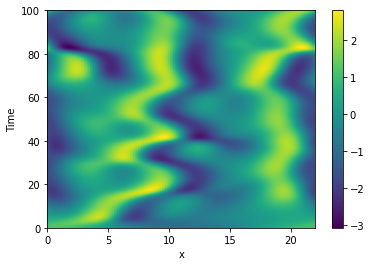

In [13]:

plot_kymograph(storage)




In [11]:
trajectory_data = np.array(storage.data)

In [12]:
trajectory_data.shape

(50001, 100)

In [13]:
trajectory_data = trajectory_data[10000:-1]

In [14]:
regridded = np.mean(trajectory_data.reshape((5,-1,100),order="F"),axis=0)

In [15]:
np.save("ks_high_res_data.npy",trajectory_data)

In [16]:
np.save("ks_coarse_grained.npy",regridded)

In [ ]:
np.save("ks_coarse_grained_larger.npy",regridded)

Other code

In [ ]:
# nu = 1
# L = 22
# nx = 1000

# t0 = 0 
# tN = 90
# dt = 0.007
# nt = int((tN - t0) / dt)

# # wave number mesh
# k = np.arange(-nx/2, nx/2, 1)

# t = np.linspace(start=t0, stop=tN, num=nt)
# x = np.linspace(start=0, stop=L, num=nx)

# # solution mesh in real space
# u = np.ones((nx, nt))
# # solution mesh in Fourier space
# u_hat = np.ones((nx, nt), dtype=complex)

# u_hat2 = np.ones((nx, nt), dtype=complex)

# # initial condition 
# u0 = np.cos((2 * np.pi * x) / L) + 0.1 * np.cos((4 * np.pi * x) / L)
# #u0 = a
# # Fourier transform of initial condition
# u0_hat = (1 / nx) * np.fft.fftshift(np.fft.fft(u0))

# u0_hat2 = (1 / nx) * np.fft.fftshift(np.fft.fft(u0**2))

# # set initial condition in real and Fourier mesh
# u[:,0] = u0
# u_hat[:,0] = u0_hat

# u_hat2[:,0] = u0_hat2

# # Fourier Transform of the linear operator
# FL = (((2 * np.pi) / L) * k) ** 2 - nu * (((2 * np.pi) / L) * k) ** 4
# # Fourier Transform of the non-linear operator
# FN = - (1 / 2) * ((1j) * ((2 * np.pi) / L) * k)

# # resolve EDP in Fourier space
# for j in range(0,nt-1):
#   uhat_current = u_hat[:,j]
#   uhat_current2 = u_hat2[:,j]
#   if j == 0:
#     uhat_last = u_hat[:,0]
#     uhat_last2 = u_hat2[:,0]
#   else:
#     uhat_last = u_hat[:,j-1]
#     uhat_last2 = u_hat2[:,j-1]
  
#   # compute solution in Fourier space through a finite difference method
#   # Cranck-Nicholson + Adam 
#   u_hat[:,j+1] = (1 / (1 - (dt / 2) * FL)) * ( (1 + (dt / 2) * FL) * uhat_current + ( ((3 / 2) * FN) * (uhat_current2) - ((1 / 2) * FN) * (uhat_last2) ) * dt )
#   # go back in real space
#   u[:,j+1] = np.real(nx * np.fft.ifft(np.fft.ifftshift(u_hat[:,j+1])))
#   u_hat2[:,j+1] = (1 / nx) * np.fft.fftshift(np.fft.fft(u[:,j+1]**2))

# # plot the result
# fig, ax = plt.subplots(figsize=(10,8))

# xx, tt = np.meshgrid(x, t)
# levels = np.arange(-3, 3, 0.01)
# cs = ax.contourf(xx, tt, u.T, cmap=cm.jet)

# fig.colorbar(cs)

# ax.set_xlabel("x")
# ax.set_ylabel("t")
# ax.set_title(f"Kuramoto-Sivashinsky: L = {L}, nu = {nu}")